In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [16]:
# Distribution graphs (histogram/bar graph) of column data
import matplotlib.pyplot as plt
import numpy as np

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    # Pick columns with between 1 and 50 unique values for display purposes
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)  # Ensuring integer value for subplot rows
    plt.figure(figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()



In [23]:
# Correlation matrix
import matplotlib.pyplot as plt

def plotCorrelationMatrix(df, graphWidth, title='Correlation Matrix'):
    # Select only numeric columns
    df = df.select_dtypes(include=[np.number])
    
    # Drop columns with NaN values
    df = df.dropna(axis='columns')
    
    # Keep columns with more than 1 unique value
    df = df[[col for col in df if df[col].nunique() > 1]]
    
    # Check if there are enough columns for correlation
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return

    # Calculate the correlation matrix
    corr = df.corr()

    # Plot the correlation matrix
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(title, fontsize=15)
    plt.show()



In [18]:
# Scatter and density plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plotScatterMatrix(df, plotSize, textSize):
    # Keep only numerical columns
    df = df.select_dtypes(include=[np.number])

    # Remove columns with NaN values
    df = df.dropna(axis='columns')
    # Keep columns with more than 1 unique value
    df = df[[col for col in df if df[col].nunique() > 1]]

    # Limit the number of columns to 10 for better visualization
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]

    # Plot scatter matrix
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')

    # Calculate correlation matrix
    corrs = df.corr().values
    # Annotate the upper triangle of the scatter matrix with correlation coefficients
    for i, j in zip(*np.triu_indices_from(corrs, k=1)):
        ax[i, j].annotate(f'Corr. coef = {corrs[i, j]:.3f}', (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)

    plt.suptitle('Scatter Matrix with Correlation Coefficients')
    plt.show()


In [19]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# training.1600000.processed.noemoticon.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('tweetdata.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'tweetdata.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 6 columns


In [20]:
df1.head(5)

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [21]:
plotPerColumnDistribution(df1, 10, 5)

<Figure size 2400x0 with 0 Axes>

In [26]:
plotCorrelationMatrix(df1, 8)

No correlation plots shown: The number of non-NaN or constant columns (1) is less than 2


Scatter and density plots:

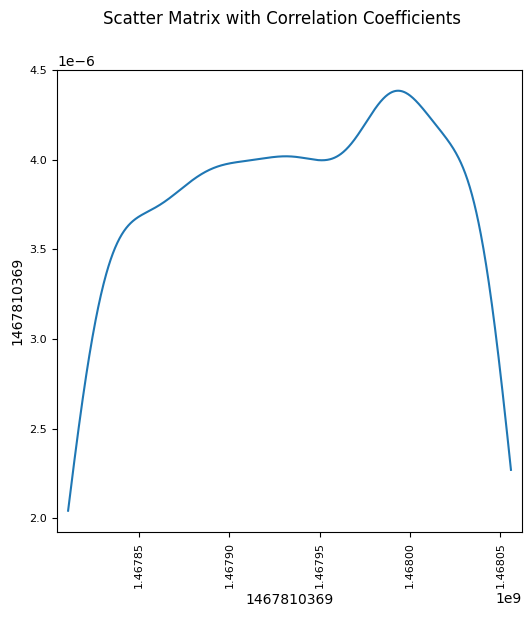

In [25]:
plotScatterMatrix(df1, 6, 15)